In [ ]:
!pip show pycocotools

# Import annotated data from labelbox

In [1]:
import json

# Load the JSON file
with open('clfdyorjc05mu07zt9xh461lc_coco_dataset.json') as f:
    data = json.load(f)
image_names = []
for image in data['images']:
    image_names.append(image['file_name'])

# Image formating in right folders

In [2]:
import os
import shutil

dest_folder = 'C:/Users/mariem/projects/pfe/mnist/folder'  # replace with the path to the folder where you want to copy the images

# iterate through all the files in the source folder
for filename in image_names:
    # check if the file is an image file and matches the naming convention
    if filename=="image_1996_label_005.jpg":
        continue
    if filename.endswith('.jpg') and 'label' in filename:
        # extract the label number from the filename
        label = int(filename.split('_')[-1].split('.')[0])
        # check if the label number is between 0 and 9 (inclusive)
        source_folder = 'C:/Users/mariem/projects/pfe/mnist/mnist_'+str(label)  # replace with the path to the folder containing the images

        if 0 <= label <= 9:
            # construct the destination filename based on the label number
            # construct the source and destination paths
            source_path = os.path.join(source_folder, filename)
            dest_path = os.path.join(dest_folder, filename)
            # copy the file from source to destination
            shutil.copy(source_path, dest_path)
            #print(source_path)


In [3]:
for filename in image_names:
    # check if the file is an image file and matches the naming convention
    
    if filename.endswith('.jpg') and 'label' in filename:
        # extract the label number from the filename
        label = int(filename.split('_')[-1].split('.')[0])
        if label not in range(0,10):
            
        # check if the label number is between 0 and 9 (inclusive)
            source_folder = 'C:/Users/mariem/projects/pfe/preprocessed_images' # replace with the path to the folder containing the images

            
            source_path = os.path.join(source_folder, filename)
            dest_path = os.path.join(dest_folder, filename)
                # copy the file from source to destination
            shutil.copy(source_path, dest_path)
            #print(dest_path)

In [5]:
import random

images = data['images']
random.shuffle(images)

annotations = data['annotations']
total_images = len(images)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

num_train = int(total_images * train_ratio)
num_val = int(total_images * val_ratio)
num_test = total_images - num_train - num_val
train_images = images[:num_train]
val_images = images[num_train:num_train + num_val]
test_images = images[num_train + num_val:]

train_annotations = []
val_annotations = []
test_annotations = []

train_image_ids = set(image['id'] for image in train_images)
val_image_ids = set(image['id'] for image in val_images)
test_image_ids = set(image['id'] for image in test_images)

for annotation in annotations:
    if annotation['image_id'] in train_image_ids:
        train_annotations.append(annotation)
    elif annotation['image_id'] in val_image_ids:
        val_annotations.append(annotation)
    elif annotation['image_id'] in test_image_ids:
        test_annotations.append(annotation)
train_data = {'images': train_images, 'annotations': train_annotations}
val_data = {'images': val_images, 'annotations': val_annotations}
test_data = {'images': test_images, 'annotations': test_annotations}

In [6]:
categories = data['categories']
train_data['categories'] = categories
val_data['categories'] = categories
test_data['categories'] = categories

In [7]:
with open('train_data.json', 'w') as f:
    json.dump(train_data, f)

with open('val_data.json', 'w') as f:
    json.dump(val_data, f)

with open('test_data.json', 'w') as f:
    json.dump(test_data, f)

In [9]:
dest_folder = 'C:/Users/mariem/Documents/Tensorflow/workspace/data/train/images'  # replace with the path to the folder where you want to copy the images
import shutil

for im in train_data['images']:
    if im['file_name']=='cramped.jpg' :
        continue
    source_folder = 'C:/Users/mariem/projects/pfe/mnist/folder' # replace with the path to the folder containing the images
    source_path = os.path.join(source_folder, im['file_name'])
    dest_path = os.path.join(dest_folder,  im['file_name'])
    shutil.copy(source_path, dest_path)
    #print(dest_path)


# Convert json of annotated data to TFRecord

In [10]:
import json
import numpy as np
from pycocotools.coco import COCO

# path to COCO annotations file
annFile = 'C:/Users/mariem/projects/new_pfe/preprocessed_images/annotations.json'

# load annotations file
with open(annFile, 'r') as f:
    dataset = json.load(f)
annotations=dataset['annotations']
images=dataset['images']

ids= []
im=[]


In [11]:
for ann in dataset['images']:
    new_ann = {
        'license': ann['license'],
        'file_name': ann['file_name'],
        'height': ann['height'],
        'width': ann['width'],
        
        'id': ann['id'],
        'coco_url': ann['coco_url']
    }
    ann.update(new_ann)

In [12]:
for ann in dataset['annotations']:
    new_ann = {
        'image_id': ann['image_id'],
        'bbox': ann['bbox'],
        'category_id': ann['category_id'],
        'id': ann['id'],
        'area': ann['area'],
        'iscrowd': 0,
        'ignore': 0,
        'segmentation': []
    }
    ann.update(new_ann)

In [13]:
# Save the COCO dictionary as a JSON file
with open('C:/Users/mariem/projects/new_pfe/preprocessed_images/annotations.json', 'w') as f:
    json.dump(dataset, f)


In [14]:
x=[]
for i in range(len(dataset['images'])):
   
    image_name = dataset['images'][i]['coco_url'].split("/")[-1].split("?")[0]
    file_name = image_name.split("-")[-1]
    #image_name = dataset['images'][i]['file_name']
    #print(image_name)
    if file_name.endswith('.jpeg'):
        
        name_without_ext = os.path.splitext(file_name)[0]
        new_name = name_without_ext + '.jpg'
        #print(new_name)
        #dataset['images'][i]['file_name']=new_name
        new_path='C:/Users/mariem/projects/pfe/tensorflow_data/train/imag_rgb/' + new_name
        dataset['images'][i]['coco_url']=new_path
        #print(new_path)
    

In [15]:
with open("C:/Users/mariem/projects/pfe/tensorflow_data/train/data_train2.json", "w") as outfile:
    # Write data to the file in JSON format
    json.dump(dataset, outfile)

In [16]:
keys = list(dataset.keys())

# Get the values of the 'items' field
items=[]
items.append(dataset[keys[0]])

image_fields = set()
for image in dataset['images']:
    image_fields.update(image.keys())
print("Image Fields:", image_fields)

annot_fields = set()
for annot in dataset['annotations']:
    annot_fields.update(annot.keys())
print("annot Fields:", annot_fields)
print(keys)

Image Fields: {'coco_url', 'id', 'file_name', 'width', 'height', 'license'}
annot Fields: {'category_id', 'id', 'segmentation', 'iscrowd', 'ignore', 'image_id', 'bbox', 'area'}
['info', 'licenses', 'categories', 'images', 'annotations']


In [17]:
def check_unique_ids(data):
    ids = set()
    for item in data:
        if 'id' in item:
            item_id = item['id']
            if item_id in ids:
                return False
            ids.add(item_id)
    return True

assert check_unique_ids(dataset['images']), "Some 'id' fields in 'images' are not unique"
assert check_unique_ids(dataset['annotations']), "Some 'id' fields in 'annotations' are not unique"
assert check_unique_ids(data['categories']), "Some 'id' fields in 'categories' are not unique"

print("All 'id' fields are unique")

All 'id' fields are unique


# Change all ids to integer

In [19]:
from pycocotools.coco import COCO

# path to COCO annotations file
new_ann_file = 'C:/Users/mariem/Desktop/data_pf/data_for_pfe/train/annotations.json'


# initialize COCO api
coco = COCO(new_ann_file)

# get list of image IDs in dataset
imgIds = coco.getImgIds()
annIs = coco.getAnnIds()

# iterate over image IDs and check if each image has annotations
for imgId in imgIds:
    annIds = coco.getAnnIds(1708)
    img = coco.loadImgs(1708)
    anns = coco.loadAnns(annIds)
    if not annIds:
        print(f"Image {imgId} has no annotations.")


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [22]:
img = coco.loadImgs(2870)
annIds = coco.getAnnIds(imgIds=2870)
anns = coco.loadAnns(annIds)
print(anns)
print(img)

[{'id': 3681, 'image_id': 2870, 'category_id': 1, 'bbox': [97, 43, 107, 214.5], 'area': 22951.5, 'segmentation': [], 'iscrowd': 0}]
[{'id': 2870, 'license': 1, 'file_name': 'i_7_img_437_jpg.rf.94dc773d05d39ab00caa7533b0d30068.jpg', 'height': 300, 'width': 300, 'date_captured': '2023-05-09T08:48:14+00:00'}]


#####  Convert to TFrecord

In [23]:
!python C:\Users\mariem\Documents/models/research/object_detection/dataset_tools/create_coco_tf_record.py \
    --logtostderr \
    --train_image_dir=C:/Users/mariem/Desktop/data_pf/new_data_pfe/train \
    --val_image_dir=C:/Users/mariem/Desktop/data_pf/new_data_pfe/valid \
    --test_image_dir=C:/Users/mariem/Desktop/data_pf/new_data_pfe/test \
    --train_annotations_file=C:/Users/mariem/Desktop/data_pf/new_data_pfe/train_annotations.coco.json \
    --val_annotations_file=C:/Users/mariem/Desktop/data_pf/new_data_pfe/valid_annotations.coco.json \
    --testdev_annotations_file=C:/Users/mariem/Desktop/data_pf/new_data_pfe/test_annotations.coco.json \
    --output_dir=C:/Users/mariem/Documents/Tensorflow/workspace/data/output \
    --debbug

image_2125_label_032309759_jpg.rf.000f1a1b4f7162c62a4d84346621e722.jpg
C:/Users/mariem/Desktop/data_pf/new_data_pfe/train\image_2125_label_032309759_jpg.rf.000f1a1b4f7162c62a4d84346621e722.jpg
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'

2024-04-21 13:20:01.707418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2024-04-21 13:20:01.707739: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0421 13:20:01.921970 20064 create_coco_tf_record.py:421] Found groundtruth annotations. Building annotations index.
I0421 13:20:01.921970 20064 create_coco_tf_record.py:433] 0 images are missing annotations.
I0421 13:20:01.921970 20064 create_coco_tf_record.py:463] On image 0 of 2940
I0421 13:20:02.528533 20064 create_coco_tf_record.py:463] On image 100 of 2940
I0421 13:20:03.141420 20064 create_coco_tf_record.py:463] On image 2


{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
image_1349_label_38893_jpg.rf.a4be2b27ddf5eb808ddf096b3bc3a1fd.jpg
C:/Users/mariem/Desktop/data_pf/new_data_pfe/train\image_1349_label_38893_jpg.rf.a4be2b27ddf5eb808ddf096b3bc3a1fd.jpg
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
{0: {'id': 0, 'name': 'Digit', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'Digit', 'supercategory': 'Digit'}}
1
image_194_label_2_jpg.rf.a1a456b722d7bfa3336603dff17e7da4.jpg
C:/Users/

In [24]:
from PIL import Image
import os

input_dir = 'C:/Users/mariem/projects/pfe/tensorflow_data/train/imag_rgb'
output_dir = 'C:/Users/mariem/projects/pfe/tensorflow_data/train/img_jpg'



for filename in os.listdir(input_dir):
    if filename.endswith('.jpeg'):
        # Open the PNG image
        png_image = Image.open(os.path.join(input_dir, filename))
        
        # Convert the PNG image to JPEG
        jpeg_image = png_image.convert('RGB')
        new_file_name = os.path.splitext(filename)[0] + '.jpg'

        print(new_file_name)
        # Save the JPEG image
        #jpeg_filename = filename.replace('.jpeg', '.jpg')
        path=output_dir + '/'+ new_file_name
        jpeg_image.save(path, 'JPEG')


# Training ssd mobilenet

In [34]:
import tensorflow as tf
latest = tf.train.latest_checkpoint('C:/Users/mariem/Desktop/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint')
latest

'C:/Users/mariem/Desktop/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint\\ckpt-0'

In [35]:
!python C:/Users/mariem/Documents/Tensorflow/workspace/model_main_tf2.py \
 --pipeline_config_path=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/pipeline.config \
 --model_dir=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc \
 --checkpoint_every_n=1 \
 --num_workers=1 \
 --alsologtostderr

^C


###### convert the checkpoints into a saved_model

In [1]:
!python C:/Users/mariem/Documents/Tensorflow/models/research/object_detection/exporter_main_v2.py \
    --pipeline_config_path=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/pipeline.config \
    --trained_checkpoint_dir=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc \
    --output_directory=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models//model/v1/model_direcc/export

2024-04-27 11:22:45.657158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2024-04-27 11:22:45.657189: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0427 11:22:45.897588 15532 deprecation.py:623] From C:\Users\mariem\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) w

# Check tensorboard

In [2]:
!tensorboard --logdir=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc/train

^C


# Eval

In [4]:
!python C:/Users/mariem/Documents/Tensorflow/models/research/object_detection/legacy/eval.py \
 --checkpoint_dir=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc/train \
 --eval_dir=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc/evaluation \
 --pipeline_config_path=C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/pipeline.config \
 --run_once=False

    

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
[04/27 13:20:01] tensorflow WARNING: From C:\Users\mariem\Documents\Tensorflow\models\research\object_detection\legacy\eval.py:59: experimental_run_functions_eagerly (from tensorflow.python.eager.def_function) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
2024-04-27 13:20:02.222929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2024-04-27 13:20:02.222957: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


## Model testing

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow_model_optimization.sparsity import keras as sparsity

# Load the SavedModel using tf.saved_model.load
model_path = 'C:/Users/mariem/Documents/Tensorflow/workspace/pre_trained_models/model/v1/model_direcc/export/saved_model'
loaded_model = tf.saved_model.load(model_path)

# Convert the TensorFlow model to a Keras model
input_signature = [
    tf.TensorSpec(shape=(None, None, None, 1), dtype=tf.uint8, name='input_tensor')
]

concrete_func = loaded_model.signatures['serving_default']
pruned_outputs = ['detection_classes', 'detection_boxes', 'detection_scores', 'num_detections']
pruned_output_tensors = []
for output_tensor in concrete_func.outputs:
    if output_tensor.name.split(':')[0] in pruned_outputs:
        output_tensor._set_control_flow_context(concrete_func.graph) 
        pruned_output_tensors.append(sparsity.prune.prune_to_output(output_tensor, input_signature=input_signature))
model = tf.keras.Sequential([tf.keras.layers.Input(shape=[None, None, 3], dtype=tf.uint8)] + pruned_output_tensors)

# Plot the architecture of the Keras model using plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [3]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
category_index = label_map_util.create_category_index_from_labelmap("C:/Users/mariem/Documents/Tensorflow/workspace/data/label_map.pbtxt",
                                                                    use_display_name=True)
category_index

{1: {'id': 1, 'name': 'Digit'}}

In [4]:
import os

folder_path = 'C:/Users/mariem/projects/pfe/tensorflow_data/test/imag_rgb'

image_paths = []
valid_image_extensions = ('.jpg', '.jpeg', '.png', '.gif') # Specify your valid image extensions here
for filename in os.listdir(folder_path):
    # Get the file extension
    extension = os.path.splitext(filename)[1]
    # Check if the file is an image and has a valid extension
    if os.path.isfile(os.path.join(folder_path, filename)) and extension.lower() in valid_image_extensions:
        # Replace backslashes with forward slashes in the file path
        file_path = os.path.join(folder_path, filename).replace('\\', '/')
        # Add the path to the list of image paths
        image_paths.append(file_path)

In [17]:
img=[]
img.append("C:/Users/mariem/projects/pfe/tensorflow_data/test/imag_rgb/image_997_label_67834386.jpg")

img

['C:/Users/mariem/projects/pfe/tensorflow_data/test/imag_rgb/image_997_label_67834386.jpg']

Running inference for C:/Users/mariem/projects/pfe/tensorflow_data/test/imag_rgb/image_997_label_67834386.jpg... Done


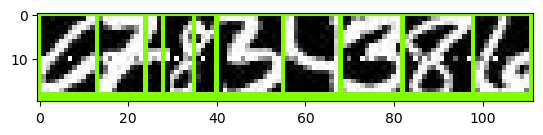

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = loaded_model(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          line_thickness=1,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2